# Multiple Qubits

A single qubit is represented by $ |\psi\rangle = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}$, where $\alpha, \beta \in \mathbb{C}$ and $|\alpha|^{2} + |\beta|^{2} = 1$.

A system of multiple qubits is represented by more states. More specifcially, a system of n qubits is represented by $2^{n}$ states i.e. a column matrix of $2^{n}$ entries.

For example, for $n = 2$, the qubit can be seen as the superposition of $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$:

$$
|\psi\rangle = \alpha|00\rangle + \beta|01\rangle + \gamma|10\rangle + \delta|11\rangle
$$

For some systems, we may describe it using the tensor product of a $ |\psi\rangle = \begin{bmatrix}\alpha \\ \beta\end{bmatrix}$ and another qubit $|\phi\rangle$:

$$
|\psi\rangle \otimes |\phi\rangle = \begin{bmatrix}\alpha|\phi\rangle \\ \beta|\phi\rangle\end{bmatrix}
$$

Sometimes, $|\psi\rangle \otimes |\phi\rangle $ is written as $|\psi\rangle|\phi\rangle $. Also, $|000\rangle = |0\rangle|0\rangle|0\rangle = |0\rangle \otimes |0\rangle \otimes |0\rangle$ thus the base for system of many qubits is defined as the tensor product of single qubits.

Notice that not all systems of n qubits can be described by tensor products: those that cannot are called entangled.

# Multiple Qubit Gates

Multiple qubit gates are gates that act on multiple qubit systems. They can interact with one or multiple qubits of the system. A gate that interacts with n qubits will have dimensions $2^{n} \times 2^{n}$. Multiple qubit gates are still unitary, that is their still respect:

$$
UU^{\dagger} = I
$$

In [45]:
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram

## Tensor Product

When applying a gate for a single qubit $G$ to a system of multiple qubits, it can be seen as applying the gate of multiple qubits $G \otimes I$.

For example, the following circuit can be described by $U = X \otimes Z$.

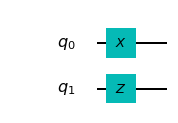

In [46]:
circuit = QuantumCircuit(2)
circuit.x(0)
circuit.z(1)
circuit.draw(output="mpl")

In [47]:
unitary_simulator = Aer.get_backend("unitary_simulator")
unitary = execute(circuit, backend=unitary_simulator).result().get_unitary()
print(unitary)

[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]]


## Controlled Not

The Controlled NOT gate is a gate that applies the X gate conditionally to a qubit based on a control qubit.

If the control qubit is $|0\rangle$, then nothing happens to the target qubit. But if it is $|1\rangle$ instead, then the Pauli-X gate is applied to the control qubit.

Notice that the CNOT gate matrix cannot be expressed as the tensor product of $2\times2$ matrices. Thus, it can be used to generate entangled states like the one we build below. The circuit creates:

$$
|\Psi^{+}\rangle = \frac{|01\rangle + |10\rangle}{\sqrt 2} 
$$

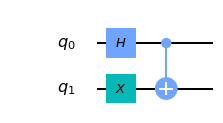

In [48]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.draw(output="mpl")

In [49]:
state_simulator = Aer.get_backend("statevector_simulator")
state_vector = execute(circuit, backend=state_simulator).result().get_statevector()
print(state_vector)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


The same way we can apply $X$ conditionally, we can also apply any gate conditionally. The next circuit applies the $Z$ gate conditionally.

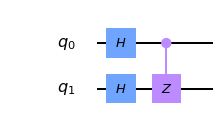

In [50]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.h(1)
circuit.cz(0, 1)
circuit.draw(output="mpl")

In [51]:
state_vector = execute(circuit, backend=state_simulator).result().get_statevector()
print(state_vector)

[ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


## Toffoli Gate

The Toffoli gate is used to calculate the logical AND of classical computers on quantum circuits.

Because the gate would not be unitary with two qubits, a third working qubit is needed. The next circuit exemplifies that idea:

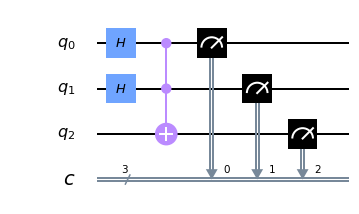

In [52]:
circuit = QuantumCircuit(3, 3)
circuit.h([0, 1])
circuit.ccx(0, 1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])
circuit.draw(output="mpl")

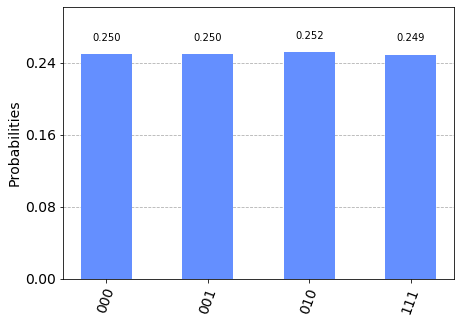

In [53]:
simulator = Aer.get_backend("qasm_simulator")
counts = execute(circuit, backend=simulator, shots=2**16).result().get_counts()
plot_histogram(counts)

## Reversible Computing

The inverse of the Toffoli gate is the Toffoli gate, and the inverse of the CNOT gate is the CNOT gate.

Thus, if applied twice to the same target qubit, they do no change. The circuit belows exploits that ideas, in which the Toffoli cancels with the Toffoli, the CNOT cancels with the CNOT and the $X$ cancels with the $X$. Hence, we expect the measurements to be always 0 for all qubits.

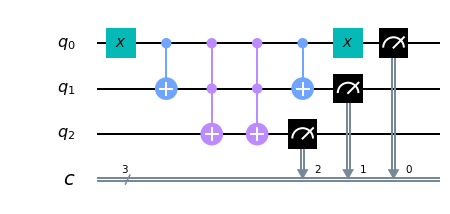

In [54]:
circuit = QuantumCircuit(3, 3)
circuit.x(0)
circuit.cx(0, 1)
circuit.ccx(0, 1, 2)
circuit.ccx(0, 1, 2)
circuit.cx(0, 1)
circuit.x(0)
circuit.measure([0, 1, 2], [0, 1, 2])
circuit.draw(output="mpl")

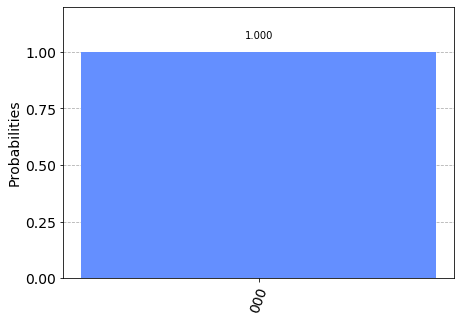

In [55]:
counts = execute(circuit, backend=simulator, shots=2**16).result().get_counts()
plot_histogram(counts)